# Definición del problema

Dado un conjunto de datos provenientes originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales se busca predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

# Importacion de los datos

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
# To save models
import math
import json
import pickle
from sklearn.linear_model import Ridge
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv")


# Analisis de los datos

In [45]:
# visualizando el dataframe
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
#eliminando datos duplicados
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<h4>Observaciones</h4>

Se tiene un total de 768  registros y 9 tipos de datos, no se tienen valores nulos para ningun registro

Todos los datos con del tipo numerico

el numero de embarazos minimo es de 0 embarazos con una media de 3 y un maximo de 17

la glucosa tiene valores minimos de 0 y maximo de 199.

la presion arteriar diastolica (BloodPressure) tambien tiene un minimo de 0 y un maximo de 122

El grosor del pliegue cutaneo  del triset (SkinThickness) tiene minimos en 0 y maximos en 99

la insulina (insulin) tiene valores minimos de 0 y maximo de 846

el indice de masa corporal (BMI) tiene valores minimos de cero y maximo de 67

la funcion de pedigri de diabetes (DiabetesPedigreeFunction) tiene minimos de 0.078 y maximos de 2.42

las personas registradas estan en un rango de 21 y 81 años con una media de 33

nuestra variable de respuesta Outcome tiene valores de cero y uno, donde cero indica que una persona no tiene diabetes y uno indica que si lo tiene, por lo menos el 25% de las personas arrojan un resultado positivo

# analisis univariante

## <h4>Embarazos</h4>

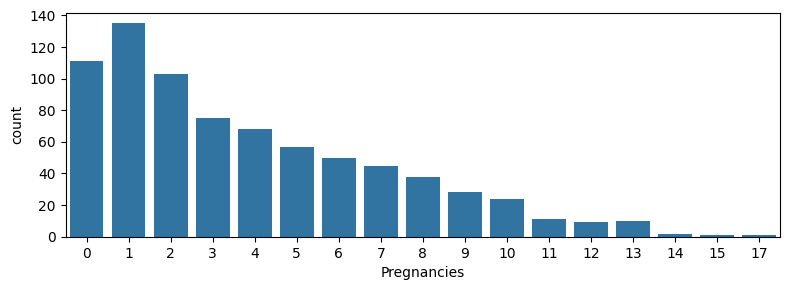

In [49]:
fig, axes = plt.subplots(figsize=(8, 3))
sns.countplot(data=df, x=df["Pregnancies"])
plt.tight_layout()
plt.show()

<h4>Observaciones<h4>
Los casos para embarazos con valores d 0, 1 y 2 son los mas comunes, disminuyendo la cantidad de registros en cuanto es mayor el numero de embarazos



## <h3>Glucosa</h3>

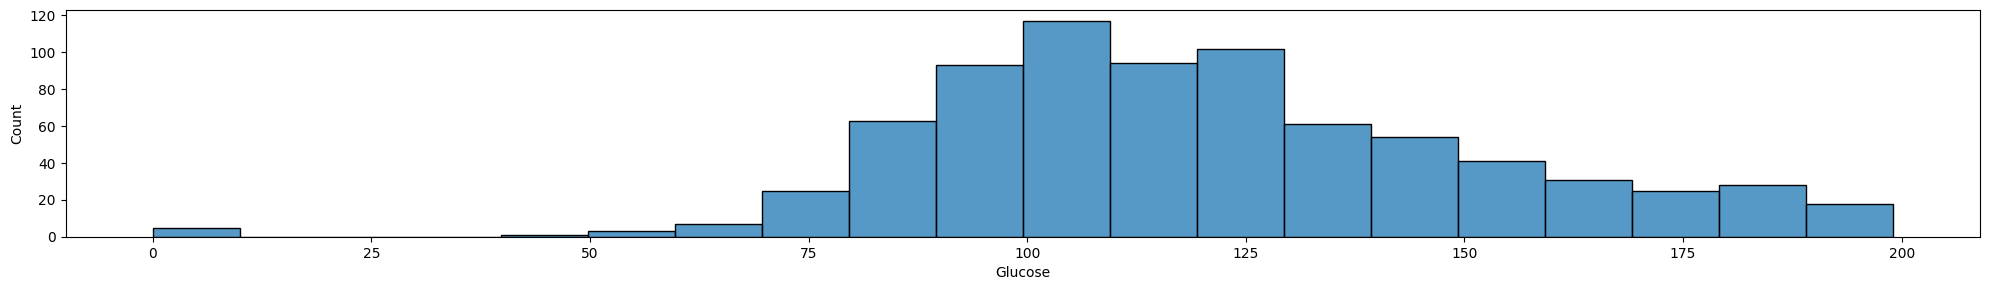

In [50]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x="Glucose", bins=20)
plt.tight_layout()
plt.show()

En un test de tolerancia oral a la glucosa (OGTT 2 horas), el valor mínimo fisiológico que puede aparecer en un paciente no es exactamente 0, pero sí puede ser muy bajo.

<h3>Valores reales en práctica clínica:</h3>

Lo normal es que los valores estén entre 70 y 140 mg/dL.

En algunas personas puede bajar a 60–70 mg/dL, especialmente si tienen hipoglucemia reactiva.

Valores < 55 mg/dL ya se consideran hipoglucemia clínica.

Fisiológicamente, un valor realista sería alrededor de: 40–50 mg/dL (hipoglucemia severa)

Valores por debajo de eso no son compatibles con la vida consciente, y suelen deberse a:
error de medición, datos mal registrados, sensores defectuosos, conversión incorrecta de unidades

In [51]:
# conversion de los datos en cero al promedio dependiendo de el numero de hijos

# Primero convertimos los 0 a NaN (porque 0 no es un valor real en OGTT)
df["Glucose"] = df["Glucose"].replace(0, np.nan)

# Ahora imputamos el promedio de glucosa según el número de embarazos
df["Glucose"] = df.groupby("Pregnancies")["Glucose"].transform(
    lambda x: x.fillna(x.mean())
)

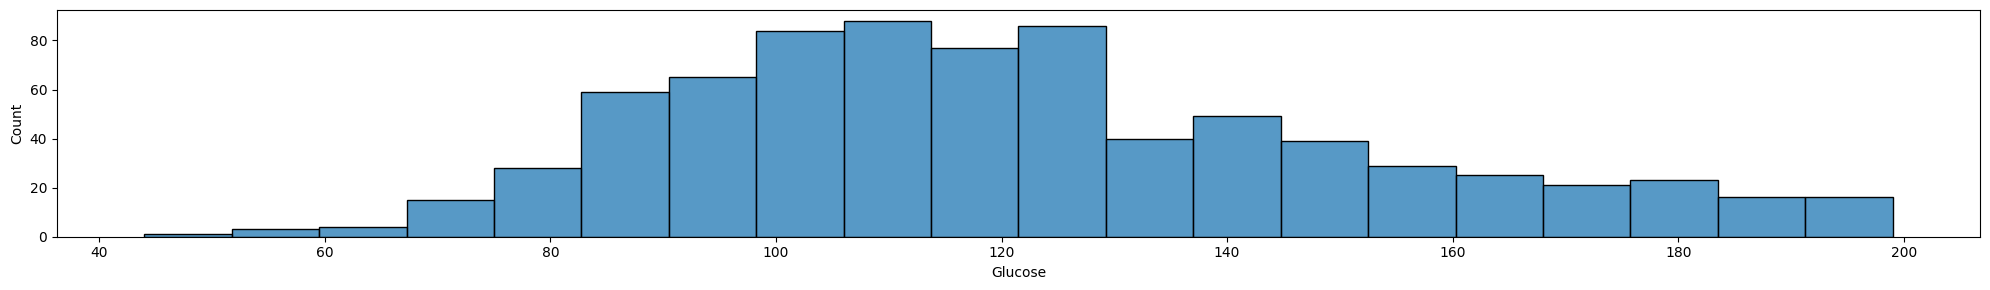

In [52]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x="Glucose", bins=20)
plt.tight_layout()
plt.show()

## <h3>Presion arterial diastolica</h3>

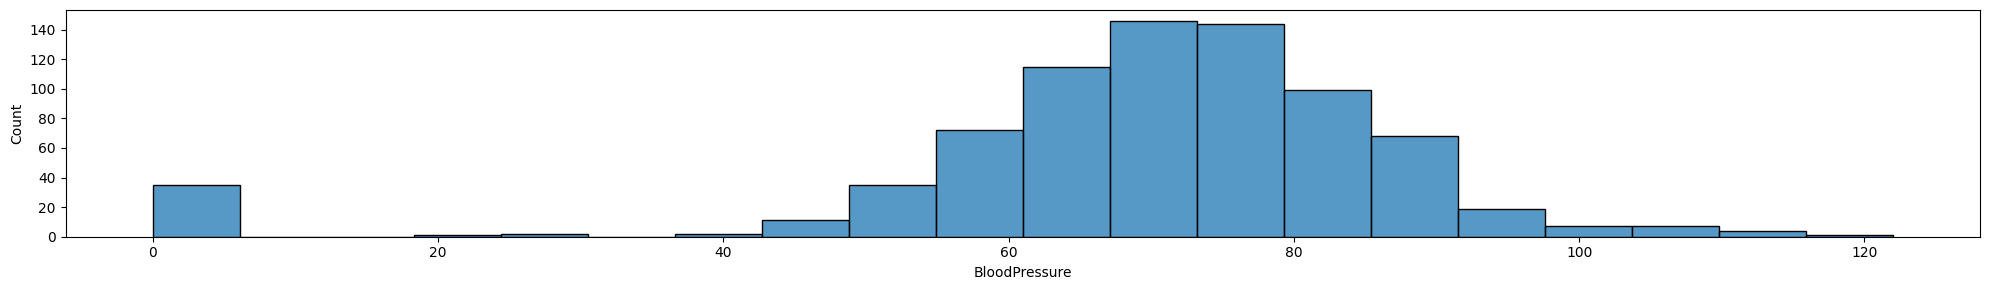

In [53]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x="BloodPressure", bins=20)
plt.tight_layout()
plt.show()

Valores clínicamente aceptables
Diastólica (mmHg)	Interpretación

≥ 90	Hipertensión grado 2

80–89	Elevada (HTA grado 1)

60–79	Normal

50–59	Hipotensión leve o persona muy atlética

40–49	Hipotensión moderada → requiere valoración
< 40	Peligroso / incompatible con estabilidad

Valores menores de 40 mmHg

NO son habituales en personas conscientes, pueden aparecer en: shock hipovolémico, sepsis, insuficiencia cardíaca terminal,
deshidratación extrema, hemorragias severas, anestesia o sedación profunda, medición incorrecta, errores del dataset

In [54]:
df[df["BloodPressure"]<=40]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40,35,168,43.1,2.288,33,1
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
18,1,103.0,30,38,83,43.3,0.183,33,0
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
125,1,88.0,30,42,99,55.0,0.496,26,1
172,2,87.0,0,23,0,28.9,0.773,25,0


In [55]:
len(df[df["BloodPressure"]<=40])

40

In [ ]:
# conversion de los datos menores a 40 al promedio dependiendo de la edad

# Primero convertimos los valores menores o iguales a 40 a NaN (porque no es un valor real en para una persona conciente)
#df["BloodPressure"] = df["BloodPressure"].mask(df["BloodPressure"] <= 40, np.nan)

# Ahora imputamos el promedio de presion arterial según la  edad
#df["BloodPressure"] = df.groupby("Age")["BloodPressure"].transform(
#    lambda x: x.fillna(x.mean())
#)

In [ ]:
df["BloodPressure"] = df["BloodPressure"].replace(0, np.nan)

promedio = df["BloodPressure"].mean()
df["BloodPressure"] = df["BloodPressure"].fillna(promedio)

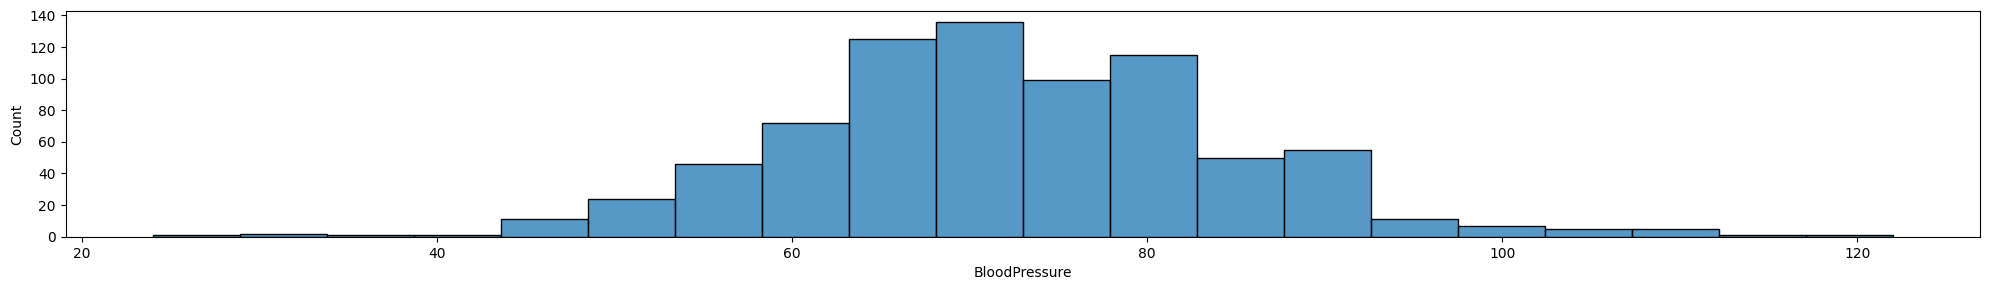

In [58]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x="BloodPressure", bins=20)
plt.tight_layout()
plt.show()

se puede observar que la mayoria de los pascientes se encuentran con un buen rango de presion arteriar, una minoria se encuentra por debajo y por encima de los valores normales.

## <h3>Grosor del pliegue cutaneo (SkinThickness)</h3>

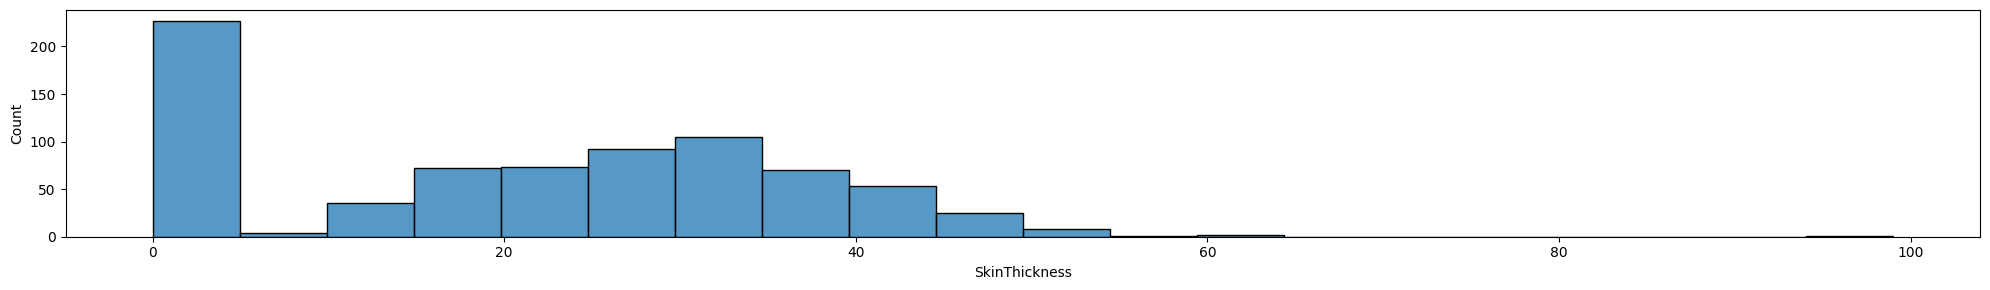

In [59]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x="SkinThickness", bins=20)
plt.tight_layout()
plt.show()

El grosor del pliegue cutaneo Refleja la cantidad de grasa subcutánea → relacionado con obesidad.

RANGOS ORIENTATIVOS (mm)

Valor	Interpretación

 10 mm	Bajo nivel de grasa

10–20 mm	Normal

20 > 30 mm	Elevado (sobrepeso)

mayor a 30 mm	Obesidad marcada

una persona con menor a 10mm ya se considera con bajo nivel de grasa pero es imposible que tenga 0mm este dato observado puede ser obtenido por
errores de escritura o por no tener una medicion precisa por lo tanto cambiaremos los datos cuyo dato sea cero al promedio con el bmi

In [60]:
# conversion de los datos en cero al promedio dependiendo de el BMi

# Primero convertimos los 0 a NaN (porque 0 no es un valor real en OGTT)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.nan)

# Ahora imputamos el promedio de glucosa según el número de embarazos
df["SkinThickness"] = df.groupby("BMI")["SkinThickness"].transform(
    lambda x: x.fillna(x.mean())
)

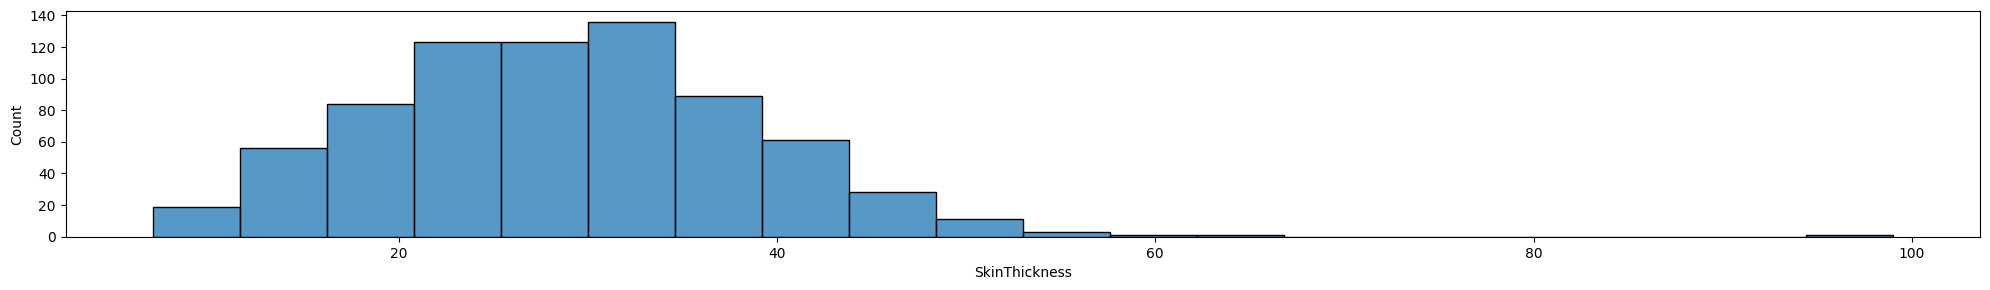

In [61]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x=df["SkinThickness"], bins=20)
plt.tight_layout()
plt.show()

se observan que mas de la mitad de los registros poseen una obesidad  marcada lleganndo incluso  a tener registros de perssonass con 60 mm de grosor y finalmente con 100mm lo que equivale a 10cm

## <h3> BMI </h3>

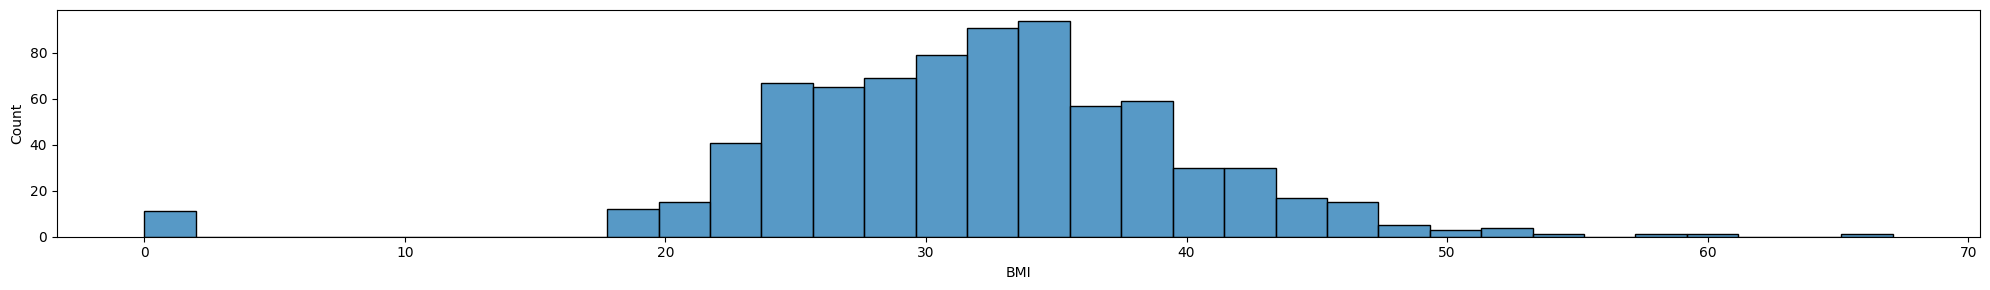

In [62]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x="BMI")
plt.tight_layout()
plt.show()

Un indicador directo de obesidad, uno de los mayores factores de riesgo para diabetes tipo 2.

RANGOS (OMS)

BMI	Clasificación

menor a 18.5	Bajo peso

18.5–24.9	Normal

25–29.9	Sobrepeso

≥ 30	Obesidad

≥ 35	Obesidad severa (riesgo muy alto de diabetes)**

Al igual que en los casos anterirores no es posible tener un BMI con valor de cero por tal motivo, los valores correspondientes se llenaran con el promedio del grosor de la piel de ese dato,  ya que el grosor en la piel puede ser indicativo del BMI



In [63]:
# conversion de los datos en cero al promedio dependiendo de el BMi

# Primero convertimos los 0 a NaN (porque 0 no es un valor real en OGTT)
df["BMI"] = df["BMI"].replace(0, np.nan)

# Ahora imputamos el promedio de glucosa según el número de embarazos
df["BMI"] = df.groupby("SkinThickness")["BMI"].transform(
    lambda x: x.fillna(x.mean())
)

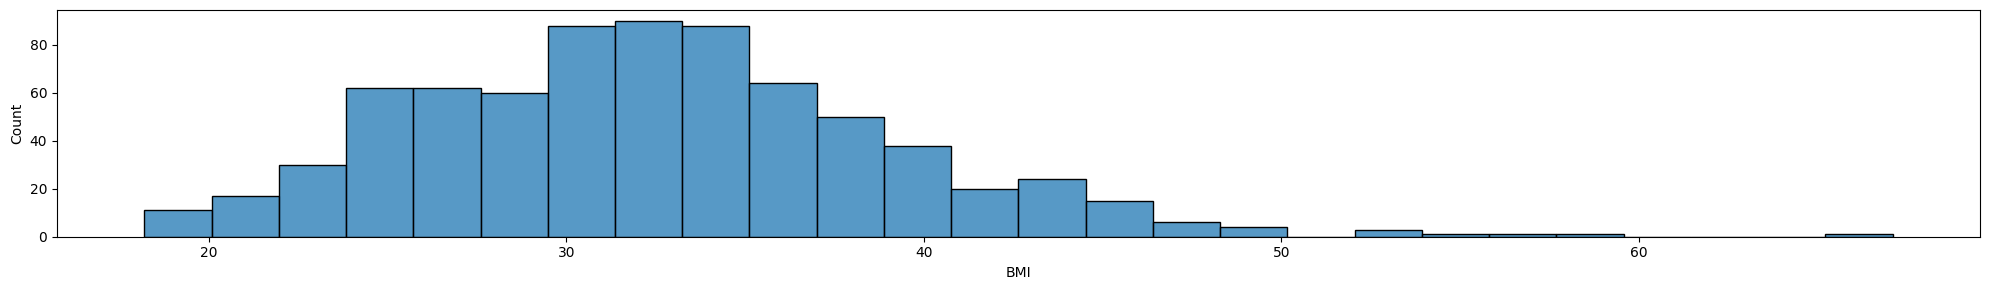

In [64]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x="BMI")
plt.tight_layout()
plt.show()

El BMI tiene una distribucion semejante al grosor de la piel, lo que podria indicar una correlacion entre ambas variables

## <h3> Edad </h3>

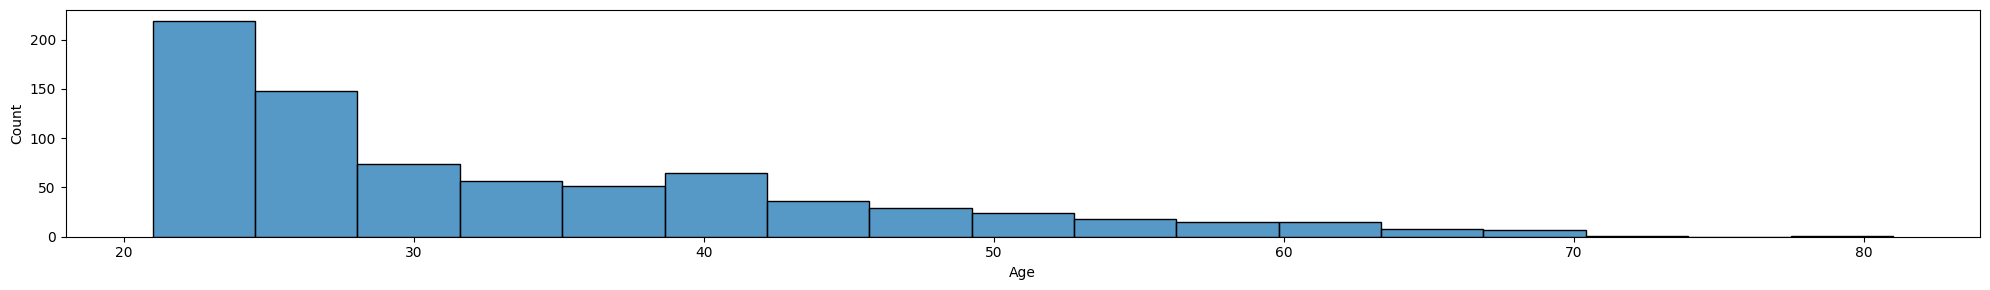

In [65]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x=df["Age"])
plt.tight_layout()
plt.show()

la  mayor parte de los registros esta entre personas con edades comprendidas entre los 21 y 34 años, a escalas menores desde los 35 hasta los 81 años

## <h3>Positivo para diabetes</h3>


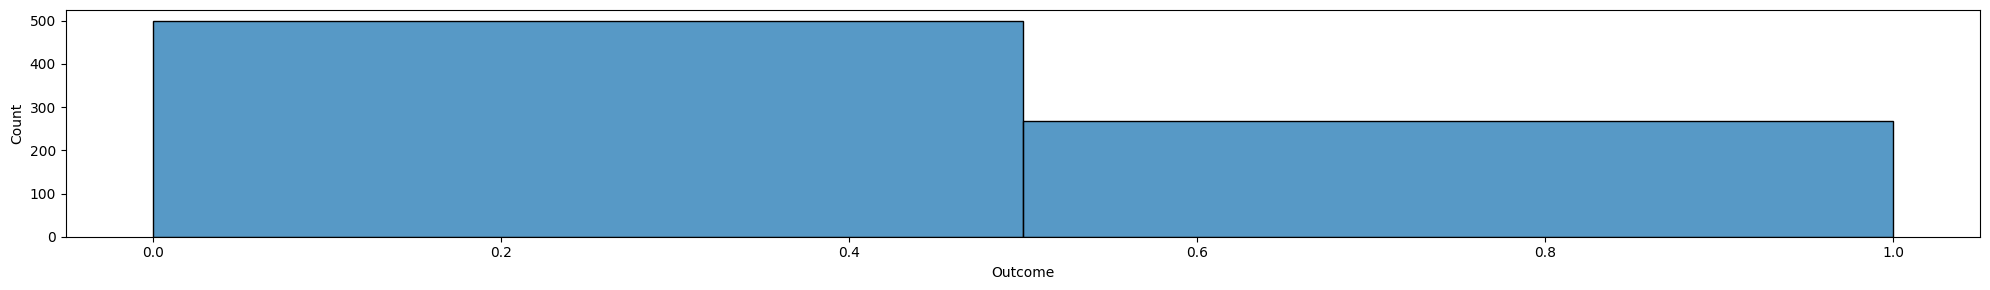

In [66]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x=df["Outcome"], bins = 2)
plt.tight_layout()
plt.show()

Se puede observar que  un 25% de los registros son personas con reultado positivo para diabetes

## <h3>DiabetesPedigreeFunction (DPF) </h3>


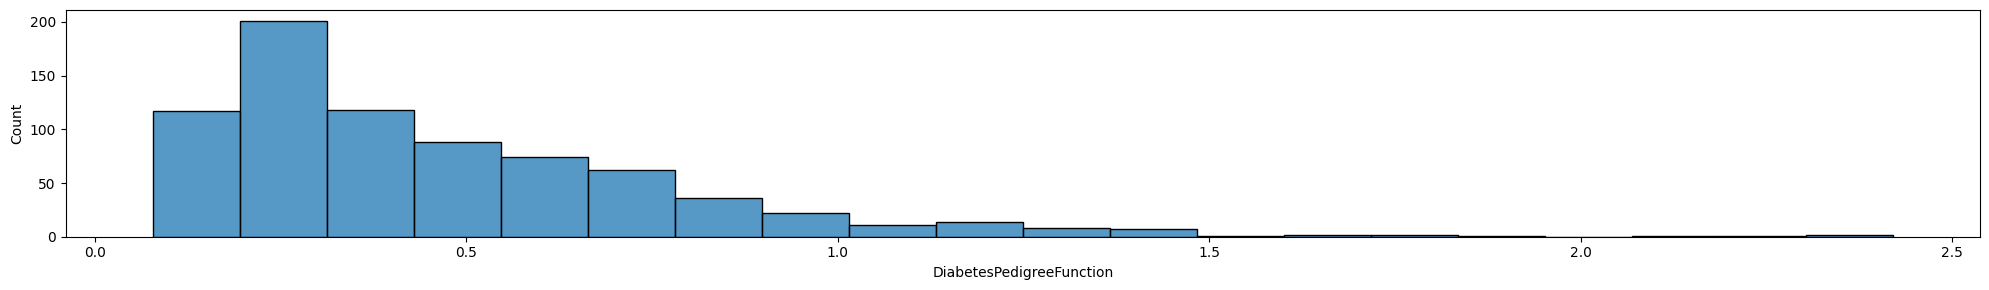

In [67]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x=df["DiabetesPedigreeFunction"], bins = 20)
plt.tight_layout()
plt.show()



la DiabetesPedigreeFunction mide riesgo genético de diabetes basado en familiares afectados.

Valores típicos del dataset van de 0 a 2,5.

INTERPRETACIÓN
Valor DPF	Riesgo genético
0.0–0.3	Bajo
0.3–0.6	Moderado
> 0.6	Alto
> 1.0	Muy alto (historia familiar muy fuerte)

## insulina

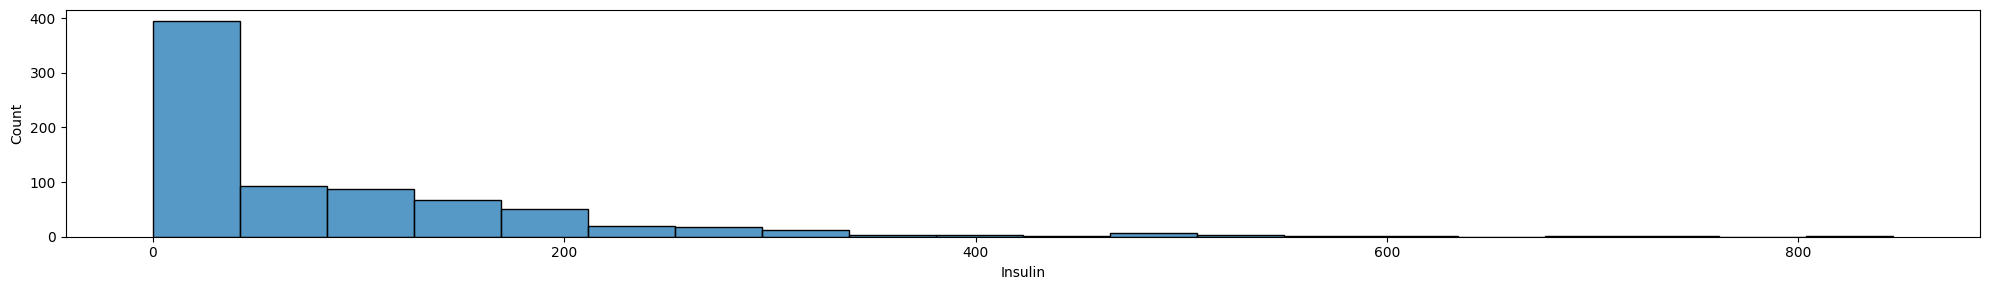

In [68]:
plt.figure(figsize=(20, 3))
sns.histplot(data=df, x=df["Insulin"], bins = 20)
plt.tight_layout()
plt.show()

Insulin (Insulina sérica a las 2h)

Ayuda a detectar resistencia a la insulina.

Valores muy bajos indican posible diabetes avanzada

Valores muy altos indican resistencia a la insulina y prediabetes.

RANGOS APROXIMADOS (mu U/ml)

Valor	Interpretación

16–166	Normal

mayor a 166	Hiperinsulinemia (resistencia a la insulina)

menor a 16	Sospecha de diabetes con fallo de células beta

en nuestro dataset tenemos que casi un 50% de los registros tienen valor de cero, lo cual es un valor no real porque si una persona tuviera insulina = 0, significaría:

fallo total de las células beta del páncreas

diabetes tipo 1 muy avanzada,y el paciente estaría en cetoacidosis diabética, una situación de emergencia,
Incluso pacientes con diabetes tipo 1 producen pequeñas cantidades (no exactamente 0).

Conclusión

Valores de insulina = 0 en un dataset NO son reales.Son_:

errores de medición, valores faltantes codificados como 0, registros defectuosos, datos sin análisis válido

In [69]:
df_insulin_with_cero = df[df["Insulin"]==0]
df_insulin_with_cero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,0,26.6,0.351,31,0
2,8,183.0,64.000000,NaN,0,NaN,0.672,32,1
5,5,116.0,74.000000,19.0,0,25.6,0.201,30,0
7,10,115.0,72.405184,40.0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,0,44.0,0.403,43,1
762,9,89.0,62.000000,11.0,0,22.5,0.142,33,0
764,2,122.0,70.000000,27.0,0,36.8,0.340,27,0
766,1,126.0,60.000000,27.0,0,30.1,0.349,47,1


al visualizar un poco algunos datos, se analiza que personas con insulina 0 tienen Outcome de cero o uno, lo cual demuestra que ha sido un error de los datos 

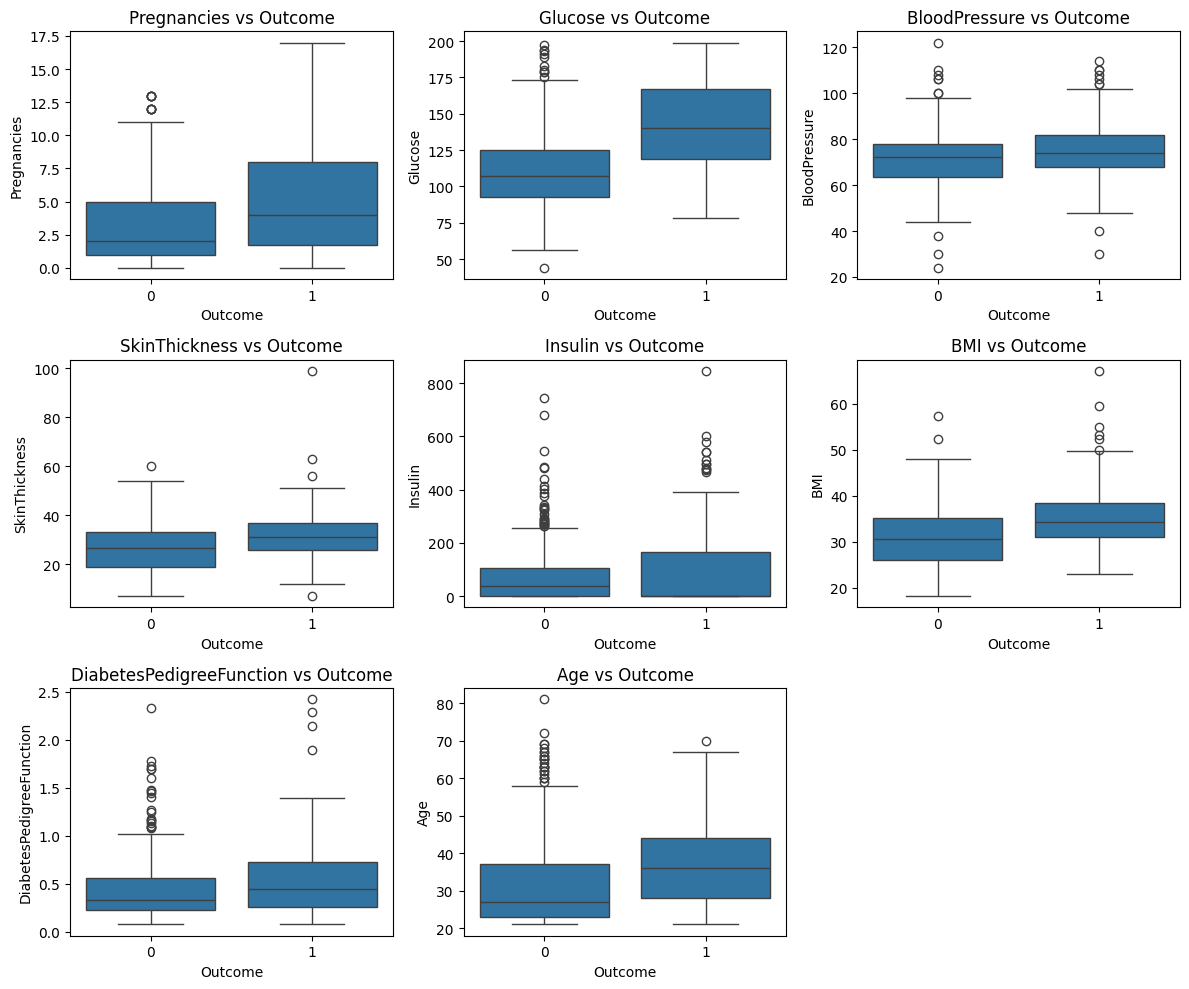

In [70]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns.drop("Outcome"), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x="Outcome", y=col)
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

## correlacion entre variables

para hacer la correlacion de las variables he decidido tomar en cuenta el dataset solo son los valores en donde la insulina es mayor que cero, ya que la misma tiene datos faltantes o erroneos para  ese valor 

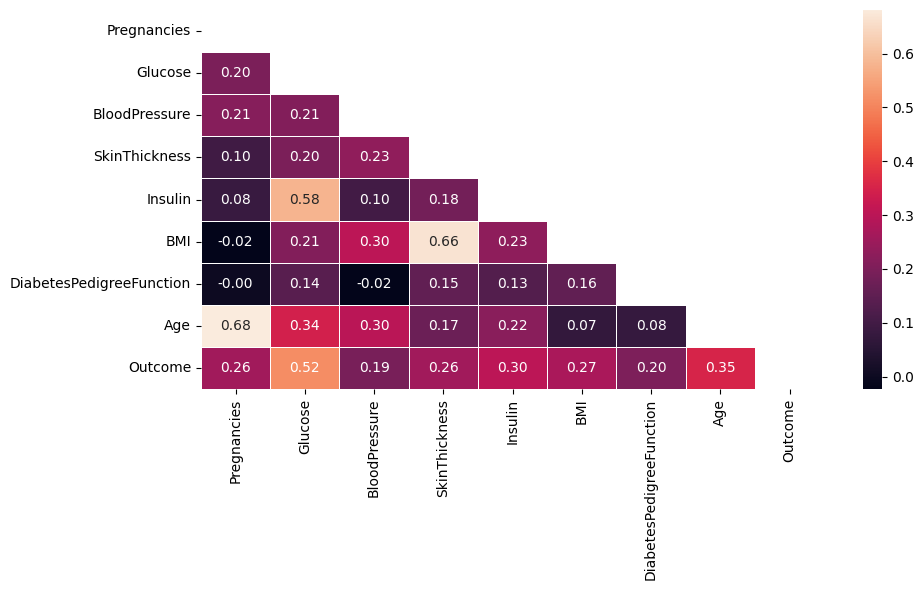

In [71]:
df_insulin_without_cero = df[df["Insulin"]>0]
corr = df_insulin_without_cero[["Pregnancies", "Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age",	"Outcome"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

La insulina parece estar  un poco relacionada con la glucosa, no es un numero alto pero valdria  la pena hacer el estudio del modelo eliminando la insulina del dataset

In [72]:
df.to_csv("/workspaces/betaniammc-machine-learning/data/processed/df_diabetes", index=False)